In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
from sklearn.model_selection import train_test_split


In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

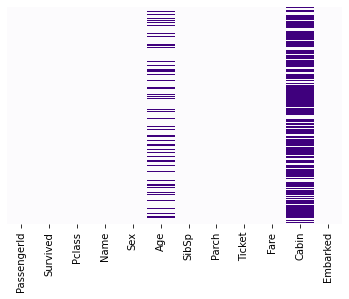

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Purples')

<AxesSubplot:xlabel='Survived', ylabel='count'>

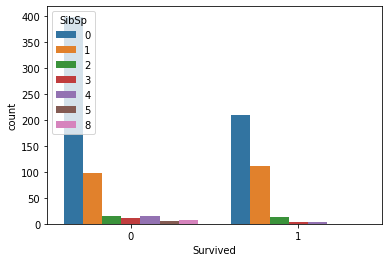

In [6]:
sns.countplot(x=train['Survived'],hue=train['SibSp'])

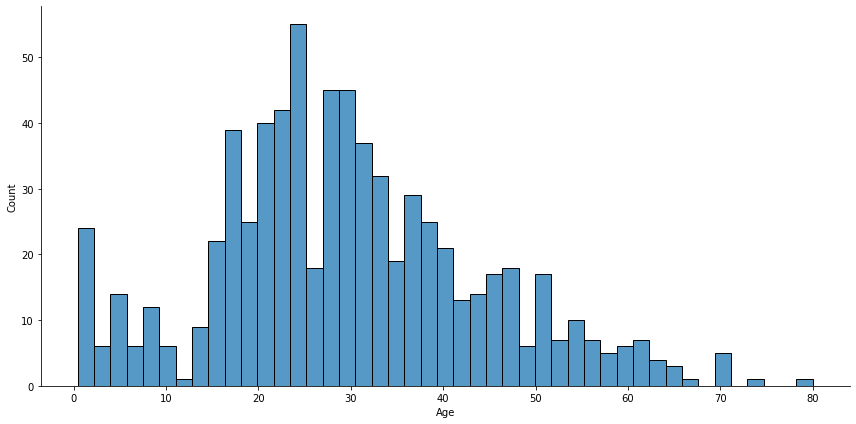

In [7]:
sns.displot(x=train['Age'].dropna(),bins=45,height=6,aspect=2)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

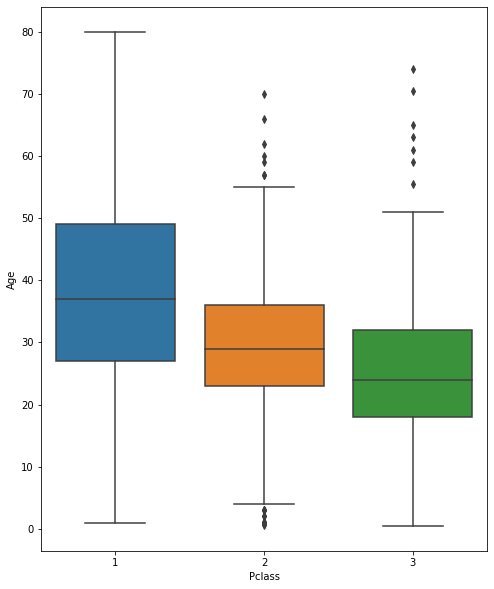

In [8]:
plt.figure(figsize=(8,10))
sns.boxplot(y=train['Age'],x=train['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

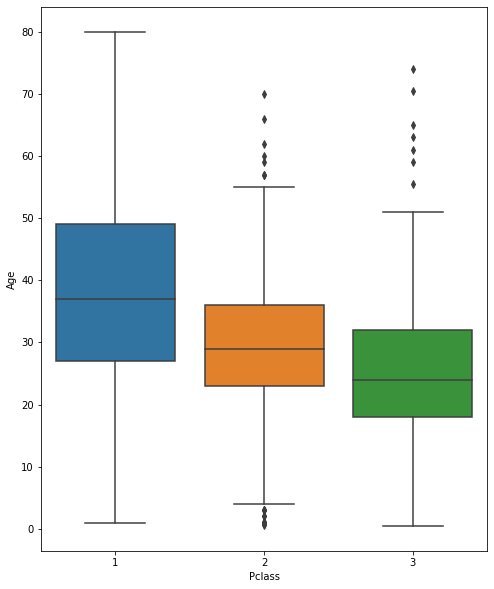

In [9]:
plt.figure(figsize=(8,10))
sns.boxplot(y=train['Age'],x=train['Pclass'])

In [10]:
def cor(lis):
    age=lis[0]
    pclass=lis[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass ==2:
            return 28
        else:
            return 24
        
    else:
        return age

In [11]:
train['Age'] = train[['Age','Pclass']].apply(cor,axis=1)

<AxesSubplot:>

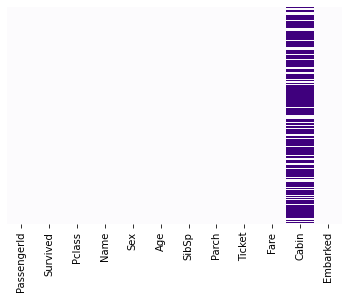

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Purples')

In [13]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

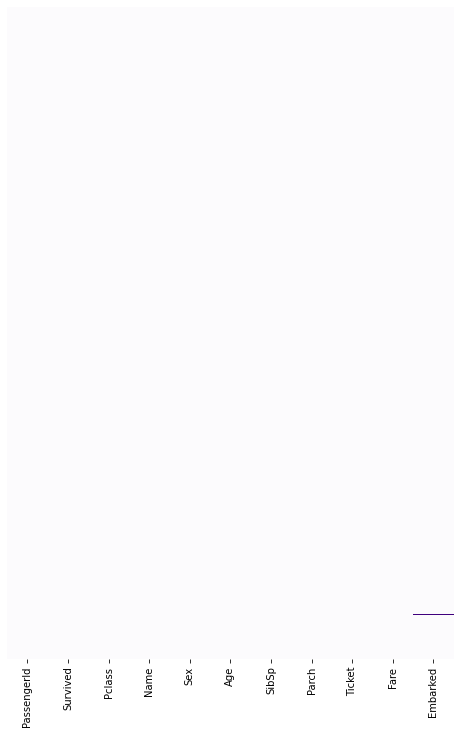

In [14]:
plt.figure(figsize=(8,12))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Purples')

In [15]:
train.dropna(inplace=True)

In [16]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [17]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [20]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [21]:
train = pd.concat([train,embarked,sex],axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


In [23]:
train.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [24]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,1
887,1,1,19.0,0,0,30.0000,0,1,0
888,0,3,24.0,1,2,23.4500,0,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


In [25]:
from sklearn.linear_model import LogisticRegression

In [55]:
x= train.drop('Survived',axis=1)
y= train['Survived']

In [41]:
test = pd.read_csv('titanic_test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [68]:
x

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,1
887,1,19.0,0,0,30.0000,0,1,0
888,3,24.0,1,2,23.4500,0,1,0
889,1,26.0,0,0,30.0000,0,0,1


In [59]:
from sklearn.linear_model import LogisticRegression

In [86]:
logr = LogisticRegression(max_iter=1100)

In [65]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
807,3,18.0,0,0,7.7750,0,1,0
651,2,18.0,0,1,23.0000,0,1,0
2,3,26.0,0,0,7.9250,0,1,0
690,1,31.0,1,0,57.0000,0,1,1
196,3,24.0,0,0,7.7500,1,0,1
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,1,0
840,3,20.0,0,0,7.9250,0,1,1
338,3,45.0,0,0,8.0500,0,1,1
524,3,24.0,0,0,7.2292,0,0,1


In [66]:
y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

In [113]:
logr.fit(x,y)

LogisticRegression(max_iter=1100)

In [114]:
prediction=logr.predict(x_test)

In [76]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [79]:
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_test,prediction)

array([[149,  14],
       [ 31,  73]])

<AxesSubplot:>

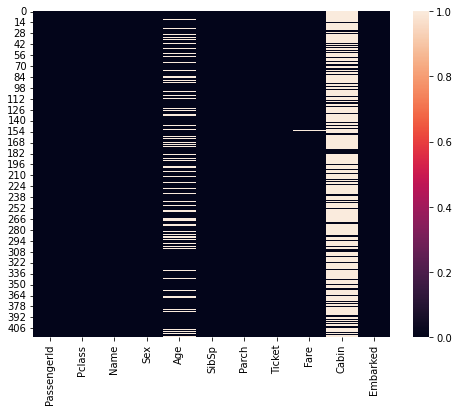

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(test.isnull())

In [95]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [96]:
test['Age'] = test[['Age','Pclass']].apply(cor,axis=1)


<AxesSubplot:>

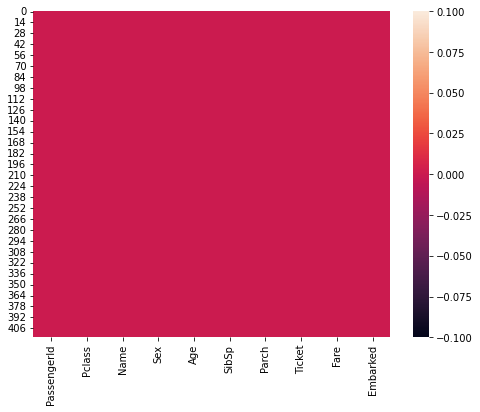

In [105]:
plt.figure(figsize=(8,6))
sns.heatmap(test.isnull())

In [104]:
test['Fare'].fillna(value=7.0000,inplace=True)

In [98]:
test.drop('Cabin',axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [99]:
test.drop('Cabin',axis=1,inplace=True)

In [47]:
test.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [48]:
test.dropna(inplace=True)

In [106]:
embark=  pd.get_dummies(test['Embarked'],drop_first=True)
embark

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [107]:
test = pd.concat([test,embark,sex],axis=1)

In [108]:
test.drop(['Embarked','Sex','Ticket','Name','Sex','PassengerId'],axis=1,inplace=True)

In [109]:
test

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,0,1,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,0,1,1
416,3,24.0,0,0,8.0500,0,1,1


In [92]:
import sklearn
sklearn.__version__

'1.0'

ModuleNotFoundError: No module named 'pandas_profiling'

In [110]:
npredict = logr.predict(test)

In [117]:
train_data = pd.read_csv('titanic_test.csv')['PassengerId']

In [120]:
train_data

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [121]:
submission = pd.DataFrame({
    'PassengerId': train_data,
    'Survived' : npredict
})

In [122]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [123]:
submission.to_csv('submission.csv',index=False)

In [125]:
submission = pd.read_csv('submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
